# DeterministicProcess

In [6]:
!pip install --upgrade --no-deps statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 5.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [1]:
from statsmodels.tsa.deterministic import DeterministicProcess
from pandas import date_range
index = date_range("2000-1-1", freq="M", periods=240)
index

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30',
               '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
               '2019-11-30', '2019-12-31'],
              dtype='datetime64[ns]', length=240, freq='M')

2차원 시간 추세 추가

`in_sample()`은 주어진 `index` 인자에 해당하는 변수들을 생성함

In [2]:
dp = DeterministicProcess(index, constant=True, order=2)
dp.in_sample().head(10)

,const,trend,trend_squared
2000-01-31,1.0,1.0,1.0
2000-02-29,1.0,2.0,4.0
2000-03-31,1.0,3.0,9.0
2000-04-30,1.0,4.0,16.0
2000-05-31,1.0,5.0,25.0
2000-06-30,1.0,6.0,36.0
2000-07-31,1.0,7.0,49.0
2000-08-31,1.0,8.0,64.0
2000-09-30,1.0,9.0,81.0
2000-10-31,1.0,10.0,100.0


계절성 더미추가

In [3]:
dp = DeterministicProcess(index, constant=True, seasonal=True)
dp.in_sample()

,const,"s(2,12)","s(3,12)","s(4,12)","s(5,12)","s(6,12)","s(7,12)","s(8,12)","s(9,12)","s(10,12)","s(11,12)","s(12,12)"
2000-01-31,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-02-29,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-03-31,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-04-30,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-05-31,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2019-09-30,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2019-10-31,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2019-11-30,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


푸리에 구성요소를 추가하여 계절성 요소 추가

In [4]:
dp = DeterministicProcess(index, constant=True, fourier=2)
dp.in_sample().head(10)

,const,"sin(1,12)","cos(1,12)","sin(2,12)","cos(2,12)"
2000-01-31,1.0,0.000000e+00,1.000000e+00,0.000000e+00,1.0
2000-02-29,1.0,5.000000e-01,8.660254e-01,8.660254e-01,0.5
2000-03-31,1.0,8.660254e-01,5.000000e-01,8.660254e-01,-0.5
2000-04-30,1.0,1.000000e+00,6.123234e-17,1.224647e-16,-1.0
2000-05-31,1.0,8.660254e-01,-5.000000e-01,-8.660254e-01,-0.5
2000-06-30,1.0,5.000000e-01,-8.660254e-01,-8.660254e-01,0.5
2000-07-31,1.0,1.224647e-16,-1.000000e+00,-2.449294e-16,1.0
2000-08-31,1.0,-5.000000e-01,-8.660254e-01,8.660254e-01,0.5
2000-09-30,1.0,-8.660254e-01,-5.000000e-01,8.660254e-01,-0.5
2000-10-31,1.0,-1.000000e+00,-1.836970e-16,3.673940e-16,-1.0


계절성

In [6]:
dp.out_of_sample(10)

,const,"s(2,3)","s(3,3)","sin(1,365.25)","cos(1,365.25)"
2013-09-09,1.0,0.0,1.0,-0.928041,-0.372479
2013-09-10,1.0,0.0,0.0,-0.934311,-0.356460
2013-09-11,1.0,1.0,0.0,-0.940304,-0.340336
2013-09-12,1.0,0.0,1.0,-0.946019,-0.324111
2013-09-13,1.0,0.0,0.0,-0.951454,-0.307790
2013-09-14,1.0,1.0,0.0,-0.956608,-0.291378
2013-09-15,1.0,0.0,1.0,-0.961479,-0.274879
2013-09-16,1.0,0.0,0.0,-0.966065,-0.258300
2013-09-17,1.0,1.0,0.0,-0.970365,-0.241644
2013-09-18,1.0,0.0,1.0,-0.974378,-0.224916


# 트렌드 #

*Tunnel Traffic* datase을 사용하여 트렌드를 확인하고, 시계열 예측 모델을 생성합니다.

## 1. 데이터 불러오기

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import util

# tunnel = pd.read_csv("./dataset/tunnel.csv", index_col='Day', parse_dates=['Day'])
tunnel = pd.read_csv("tunnel.csv", index_col='Day', parse_dates=['Day'])
tunnel = tunnel.to_period()
tunnel.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


## 2. 트렌드 확인하기

이동 평균을 구하기 위해, `rolling()`을 사용하여 윈도우에 따른 평균값을 계산합니다.

- window=365: 365일을 기준으로 창을 생성
- center=True: 중간값을 기준으로 연산 수행
- min_periods=183: 연산을 위해 필요한 최소 데이터의 수 

In [9]:
moving_average = tunnel.rolling(window=365, center=True, min_periods=183).mean()    
moving_average.head()

,NumVehicles
Day,
2003-11-01,99127.426230
2003-11-02,99094.489130
2003-11-03,99112.481081
2003-11-04,99146.639785
2003-11-05,99196.122995


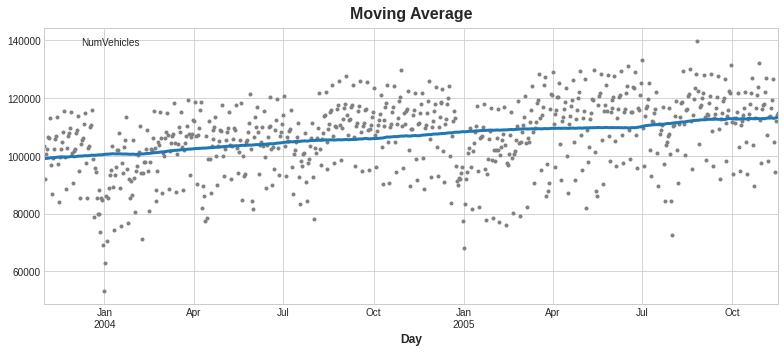

In [10]:
util.init_plt()
ax = tunnel.plot(style=".", color="0.5")
moving_average.plot(ax=ax, linewidth=3, title="Moving Average", legend=False,);

터널 교통량의 추세는 선형 관계임을 확인할 수 있음

## 3. 데이터 전처리

In [11]:
from statsmodels.tsa.deterministic import DeterministicProcess

dp = DeterministicProcess(index=tunnel.index, constant=True, order=1, drop=True)

X = dp.in_sample()
y = tunnel["NumVehicles"]  
X.head()

,const,trend
Day,,
2003-11-01,1.0,1.0
2003-11-02,1.0,2.0
2003-11-03,1.0,3.0
2003-11-04,1.0,4.0
2003-11-05,1.0,5.0


## 4. 학습

독립변수로 `const`항을 사용하므로, 매개변수 `fit_intercept=False`로 설정하여 중복된 항목이 생기지 않도록 설정

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(X, y)

LinearRegression(fit_intercept=False)

## 5. 예측

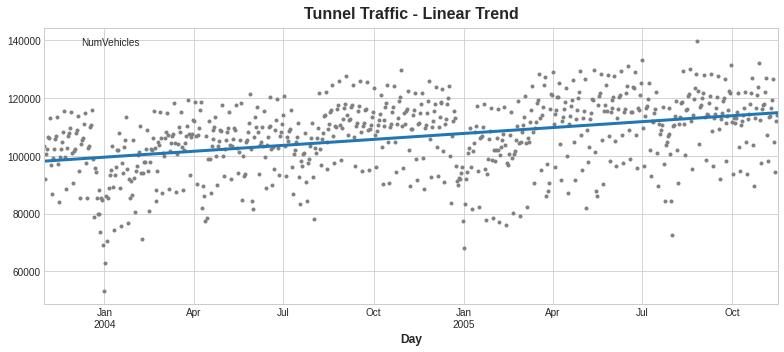

In [13]:
y_pred = pd.Series(model.predict(X), index=X.index)

ax = tunnel.plot(style=".", color="0.5", title="Tunnel Traffic - Linear Trend")
_ = y_pred.plot(ax=ax, linewidth=3, label="Trend")

`LinearRegression` 모델의 예측결과가 이동평균플롯과 거의 유사하다. 즉 1차원 선형 트렌드를 적용하여 예측한 것이 적합함을 알 수 있다. 30일 이후의 값을 예측하기 위해 `out_of_sample()`을 생성한다.

In [14]:
X = dp.out_of_sample(steps=30)

y_fore = pd.Series(model.predict(X), index=X.index)
y_fore.head()

2005-11-17    114981.801146
2005-11-18    115004.298595
2005-11-19    115026.796045
2005-11-20    115049.293494
2005-11-21    115071.790944
Freq: D, dtype: float64

30일 이후의 예측 결과를 함께 플롯

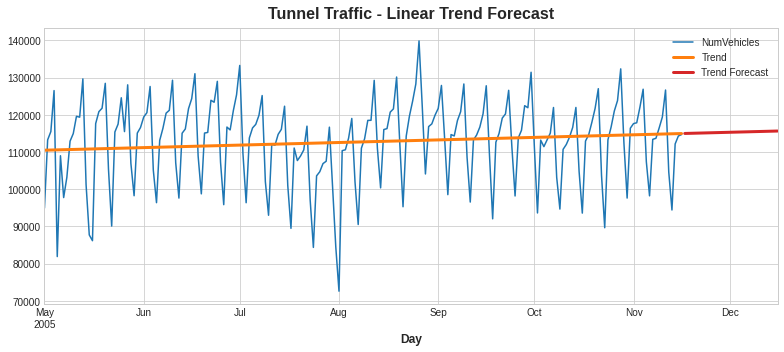

In [15]:
ax = tunnel["2005-05":].plot(title="Tunnel Traffic - Linear Trend Forecast")
ax = y_pred["2005-05":].plot(ax=ax, linewidth=3, label="Trend")
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color="C3")
_ = ax.legend()